### Figure 7
(a) Estimated daily surface runoff from RACMO (Noël et al., 2019) and MAR (Fettweis et al., 2017), across the main hydrological basin of Jakobshavn Isbræ. 

(b) Estimated annual cumulative surface runoff from RACMO (Noël et al., 2019) and MAR (Fettweis et al., 2017), across the main hydrological basin of Jakobshavn Isbræ. Dashed lines represent the mean annual cumulative runoff between 2018-2023, calculated for RACMO and MAR respectively. Note that all RCM outputs were extracted from Mankoff (2020). 

In [1]:
# IMPORT MODULES
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

In [2]:
# DEFINE THE RACMO AND MAR DATASETS
racmo_ds = xr.open_dataset('R:/JAKOBSHAVN/DATA/surface_runoff/ken_mankoff/freshwater/ice/RACMO.nc')
mar_ds = xr.open_dataset('R:/JAKOBSHAVN/DATA/surface_runoff/ken_mankoff/freshwater/ice/MAR.nc')

# DEFINE THE STATION_ID [OUTLET ID] FOR JAKOBSHAVN ISBRAE 
station_id = 62369
racmo_discharge_timeseries = racmo_ds['discharge'].sel(station=station_id)
mar_discharge_timeseries = mar_ds['discharge'].sel(station=station_id)

# DEFINE THE START AND END DATE FOR THE TIMESERIES (2018-2023)
start_date = '2018-01-01'
end_date = '2022-12-31'

# CALCULATE THE CUMULATIVE ANNUAL RUNOFF FROM THE RACMO DATA
racmo_discharge_timeseries = racmo_discharge_timeseries.sel(time=slice(start_date, end_date))
racmo_cumulative_volume_daily = racmo_discharge_timeseries * 86400 # Convert m3/s to m3/day
racmo_cumulative_volume_yearly = racmo_cumulative_volume_daily.resample(time='Y').sum()

# CALCULATE THE CUMULATIVE ANNUAL RUNOFF FROM THE MAR DATA
mar_discharge_timeseries = mar_discharge_timeseries.sel(time=slice(start_date, end_date))
mar_cumulative_volume_daily = mar_discharge_timeseries * 86400
mar_cumulative_volume_yearly = mar_cumulative_volume_daily.resample(time='Y').sum()

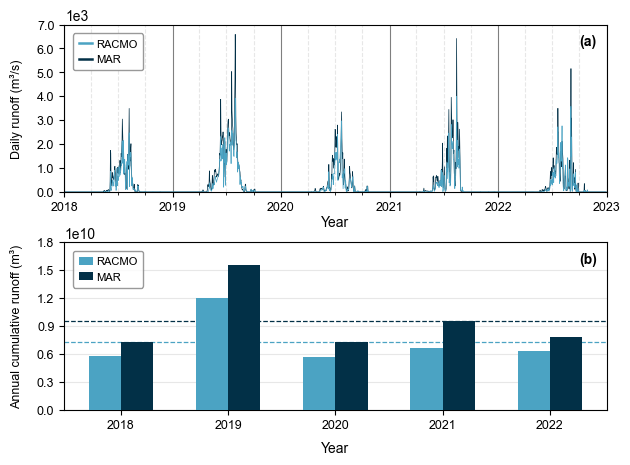

In [3]:
# INITIALISE A FIGURE WITH TWO SUBPLOTS AND GRID LINES SHOWN
plt.rcParams["font.family"] = "Arial"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5))
plt.subplots_adjust(hspace=0.3) 
ax1.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
ax1.grid(axis = 'x', which='minor', linestyle='--', alpha=0.3)
ax2.grid(axis='y', alpha=0.3, zorder=0)
bar_width = 0.3

# # PLOT 1 - DAILY RUNOFF (2018-2023) FROM RACMO AND MAR # # 
ax1.plot(mar_discharge_timeseries['time'], mar_discharge_timeseries.values/1000, label='MAR', linewidth=0.5, color='#023047')
ax1.plot(racmo_discharge_timeseries['time'], racmo_discharge_timeseries.values/1000, label='RACMO', linewidth=0.5, color='#4ba3c3')
three_month_intervals = mdates.MonthLocator(interval=3)
ax1.xaxis.set_minor_locator(three_month_intervals)

# FORMAT THE Y-AXIS TICKS AND TITLE
ax1.set_ylim(0, 7)
y_ticks = np.arange(0, 7 + 1, 1)
y_ticks_with_decimal = [f'{val:.1f}' for val in y_ticks]
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks_with_decimal)
ax1.annotate("1e3", xy=(0.0025, 1.025), xycoords="axes fraction", fontsize=10, color="black")
ax1.annotate("(a)", xy=(0.95, 0.875), xycoords="axes fraction", fontsize=10, color="black", weight="bold")
ax1.set_ylabel('Daily runoff (m³/s)', labelpad=10, fontsize=9)
ax1.set_xlabel('Year', labelpad=1, fontsize=10)

# FORMAT THE X-AXIS TICKS
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
ax1.set_xlim(min_x_value, max_x_value)

# FORMAT THE LEGEND 
handles, labels = ax1.get_legend_handles_labels()
handles = handles[::-1] # Reverse order so RACMO is labelled first
labels = labels[::-1]
ax1.legend(handles, labels, handlelength=1.2, handleheight=0.6, handletextpad=0.4, frameon=True, borderpad=0.5, borderaxespad=0.8, markerscale=4, fontsize=8, fancybox=True, loc='upper left')
for line in ax1.get_legend().get_lines():
    line.set_linewidth(1.8)
ax1.get_legend().get_frame().set_edgecolor('grey')
ax1.get_legend().get_frame().set_linewidth(1)

# # PLOT 2 - ANNUAL CUMULATIVE RUNOFF (2018-2023) FROM RACMO AND MAR # # 
years = [2018, 2019, 2020, 2021, 2022]
racmo_positions = np.arange(len(years))
ax2.bar(racmo_positions - bar_width / 2, racmo_cumulative_volume_yearly, width=bar_width, color='#4ba3c3', zorder=20, label='RACMO')
mar_positions = np.arange(len(years))
ax2.bar(mar_positions + bar_width / 2, mar_cumulative_volume_yearly, width=bar_width, zorder=20, color='#023047', label='MAR')

# FORMAT THE Y-AXIS TICKS AND TITLE
ax2.set_ylim(0, 1.8e10)
ax2.set_yticks(np.arange(0, 1.8e10 + 2e9, 3e9))
ax2.set_ylabel('Annual cumulative runoff (m³)', labelpad=10, fontsize=9)
ax2.set_xticks(mar_positions)
ax2.set_xticklabels(years)
ax2.set_xlabel('Year', labelpad=7, fontsize=10)
ax2.annotate("(b)", xy=(0.95, 0.875), xycoords="axes fraction", fontsize=10, color="black", weight="bold")

# FORMAT THE LEGEND
legend = ax2.legend(handlelength=1.3, handletextpad=0.3, frameon=True, borderpad=0.5, borderaxespad=0.8, markerscale=1, fontsize=8, fancybox=True, loc='upper left')
legend.get_frame().set_edgecolor('grey')
legend.get_frame().set_linewidth(1)

# ADD HORIZONTAL LINES SHOWING THE MEAN ANNUAL CUMULATIVE RUNOFF
mean_mar_cumulative = np.mean(mar_cumulative_volume_yearly)
mean_racmo_cumulative = np.mean(racmo_cumulative_volume_yearly)
ax2.axhline(mean_racmo_cumulative, color='#4ba3c3', linestyle='--', label=f'Mean RACMO ({mean_racmo_cumulative:.2e} m³)', linewidth=0.9)
ax2.axhline(mean_mar_cumulative, color='#023047', linestyle='--', label=f'Mean MAR ({mean_mar_cumulative:.2e} m³)', linewidth=0.9)

ax1.tick_params(axis='x', labelsize=9)
ax1.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='x', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)

plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_7.png', dpi=300)